# Symptoms Based Disease Predition and Its Treatments
A Bangkit Final Project proposed by B21-CAP0170

There are a lot of diseases that you need to detect at an early stage to be able to identify the treatment plan early on and help the patient secure a good way to live. An early detection of disease and a precise diagnosis allows for quicker action, saving precious time, and to prevent complications and rapid worsening. Health practitioners have conducted surveys and collected data on patient information, their disease, and symptoms that allow them to distinguish the patient's disease with common symptoms. Therefore, the dataset can be used to train the model that predicts the disease based on the symptoms.

## Importing Library

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
import tensorflow as tf

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

In [2]:
# Read the dataset csv file
df = pd.read_csv("Dataset/dataset.csv")
df_precaution = pd.read_csv("Dataset/symptom_precaution.csv")
df_description = pd.read_csv("Dataset/symptom_description.csv")
df_precaution = df_precaution.fillna(0)
df_description.to_dict(orient='records')

[{'Disease': 'Drug Reaction',
  'Description': 'An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.'},
 {'Disease': 'Malaria',
  'Description': 'An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.'},
 {'Disease': 'Allergy',
  'Description': "An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens."},
 {'Disease': 'Hypothyroidism',
  'Description': 'Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not p

In [3]:
# Filter DataFrame to disease only (delete all symptom columns)
disease_only = df
for a in range(1, 18):
    disease_only = disease_only.drop([df.columns[a]], axis=1)

disease_only.head()

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [4]:
# Put all unique disease to a list
disease_list = disease_only['Disease'].unique().tolist()
print(f"Labels of diseases: {disease_list}")

Labels of diseases: ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer disease', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine', 'Cervical spondylosis', 'Brain hemorrhage', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemorrhoids', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', 'Benign paroxysmal positional vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


In [5]:
# The total number of the diseases in the dataset
len(disease_list)

41

In [6]:
# Filter DataFrame to symptoms only (delete the disease column)
first_column = df.columns[0]
symptoms_only = df.drop([first_column], axis=1)

# Saving to new file
# df.to_csv('file.csv', index=False)

symptoms_only.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Put all unique symptoms to a list
symptoms = []

for i in range(1, 18):
    for x in symptoms_only[f'Symptom_{i}'].tolist():
        if str(x) != 'nan' and str(x) not in symptoms:
            symptoms.append(x)


print(f"Featured symptoms: {symptoms}")

Featured symptoms: ['itching', 'skin_rash', 'continuous_sneezing', 'shivering', 'stomach_pain', 'acidity', 'vomiting', 'indigestion', 'muscle_wasting', 'patches_in_throat', 'fatigue', 'weight_loss', 'sunken_eyes', 'cough', 'headache', 'chest_pain', 'back_pain', 'weakness_in_limbs', 'chills', 'joint_pain', 'yellowish_skin', 'constipation', 'pain_during_bowel_movements', 'breathlessness', 'cramps', 'weight_gain', 'mood_swings', 'neck_pain', 'muscle_weakness', 'stiff_neck', 'pus_filled_pimples', 'burning_micturition', 'bladder_discomfort', 'high_fever', 'nodal_skin_eruptions', 'ulcers_on_tongue', 'loss_of_appetite', 'restlessness', 'dehydration', 'dizziness', 'weakness_of_one_body_side', 'lethargy', 'nausea', 'abdominal_pain', 'pain_in_anal_region', 'sweating', 'bruising', 'cold_hands_and_feets', 'anxiety', 'knee_pain', 'swelling_joints', 'blackheads', 'foul_smell_of_urine', 'skin_peeling', 'blister', 'dischromic_patches', 'watering_from_eyes', 'extra_marital_contacts', 'diarrhoea', 'loss

In [8]:
# The total number of the symptoms in the dataset
len(symptoms)

131

In [9]:
# Get a list like this --> ['Symptom_1', Symptom_2, ..., Symptom_17 ]
cols = [i for i in df.iloc[:,1:].columns]
print(cols)

['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [10]:
# Turns all columns in 'cols' to variable column.
# The number of rows of tmp DataFrame is 17x from the original DataFrame

tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )

# Adding a value to each symptoms column by 1
tmp['add_value'] = 1
tmp.head()

,index,variable,value,add_value
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [11]:
pd.set_option('display.max_columns', 150)

# Pivot table
diseases = pd.pivot_table(tmp, 
                          values = 'add_value',
                          index = 'index',
                          columns = 'value')

# Add labels column
diseases.insert(0,'label',df['Disease'])

# Fill NaN with zero
diseases = diseases.fillna(0)
# diseases.head()

symptoms_list = []
for column in diseases:
    if column != 'label':
        symptoms_list.append(column)

diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic_patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_of_urine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,inflammatory_nails,internal_itching,irregular_sugar_level,irritability,irritation_in_anus,itching,joint_pain,knee_pain,lack_of_concentration,lethargy,loss_of_appetite,loss_of_balance,loss_of_smell,malaise,mild_fever,mood_swings,movement_stiffness,mucoid_sputum,muscle_pain,muscle_wasting,muscle_weakness,nausea,neck_pain,nodal_skin_eruptions,obesity,pain_behind_the_eyes,pain_during_bowel_movements,pain_in_anal_region,painful_walking,palpitations,passage_of_gases,patches_in_throat,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look,ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# TensorFlow Decision Forests Algorithm

In [12]:
"""
Our dataset classification label is represented as a string.
Keras expected classification labels to be integers.
"""

# Assign the label column name to a variable
label = "label"

# Converting string to a unique integers for each diseases
diseases[label] = diseases[label].map(disease_list.index)
diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic_patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_of_urine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,inflammatory_nails,internal_itching,irregular_sugar_level,irritability,irritation_in_anus,itching,joint_pain,knee_pain,lack_of_concentration,lethargy,loss_of_appetite,loss_of_balance,loss_of_smell,malaise,mild_fever,mood_swings,movement_stiffness,mucoid_sputum,muscle_pain,muscle_wasting,muscle_weakness,nausea,neck_pain,nodal_skin_eruptions,obesity,pain_behind_the_eyes,pain_during_bowel_movements,pain_in_anal_region,painful_walking,palpitations,passage_of_gases,patches_in_throat,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look,ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [13]:
# Split dataset for training 70% and test 30%
train_7 = diseases.sample(frac = 0.7, random_state = 1)
test_7 = diseases.drop(index = train_7.index)

# Split dataset for training 80% and test 20%
train_8 = diseases.sample(frac = 0.8, random_state = 1)
test_8 = diseases.drop(index = train_8.index)

# Split dataset for training 90% and test 10%
train_9 = diseases.sample(frac = 0.9, random_state = 1)
test_9 = diseases.drop(index = train_9.index)

train = train_7
test = test_7

In [14]:
# Shape of training data
train.shape

(3444, 132)

In [15]:
# Shape of test data
test.shape

(1476, 132)

In [16]:
# Convert the pandas dataframe to tensorflow datasets
train_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(train, label=label)
test_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(test, label=label)

In [17]:
# Specify the model
model = tfdf.keras.RandomForestModel()

# Optionally, add evaluation metrics
model.compile(
    metrics=["accuracy"]
)

# Train the model
with sys_pipes():
    model.fit(x=train_tfdf)

2021-06-01 11:20:38.854394: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-06-01 11:20:38.879396: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3500000000 Hz


54/54 [==============================] - 4s 5ms/step


[INFO kernel.cc:746] Start Yggdrasil model training
[INFO kernel.cc:747] Collect training examples
[INFO kernel.cc:392] Number of batches: 54
[INFO kernel.cc:393] Number of examples: 3444
[INFO kernel.cc:769] Dataset:
Number of records: 3444
Number of columns: 132

Number of columns by type:
	NUMERICAL: 131 (99.2424%)
	CATEGORICAL: 1 (0.757576%)

Columns:

NUMERICAL: 131 (99.2424%)
	0: "abdominal_pain" NUMERICAL mean:0.202962 min:0 max:1 sd:0.402204
	1: "abnormal_menstruation" NUMERICAL mean:0.0473287 min:0 max:1 sd:0.212341
	2: "acidity" NUMERICAL mean:0.0432636 min:0 max:1 sd:0.20345
	3: "acute_liver_failure" NUMERICAL mean:0.0200348 min:0 max:1 sd:0.140119
	4: "altered_sensorium" NUMERICAL mean:0.0235192 min:0 max:1 sd:0.151545
	5: "anxiety" NUMERICAL mean:0.0197445 min:0 max:1 sd:0.139121
	6: "back_pain" NUMERICAL mean:0.0505226 min:0 max:1 sd:0.219021
	7: "belly_pain" NUMERICAL mean:0.0223577 min:0 max:1 sd:0.147844
	8: "blackheads" NUMERICAL mean:0.0235192 min:0 max:1 sd:0.151545

learner: "RANDOM_FOREST"
features: "abdominal_pain"
features: "abnormal_menstruation"
features: "acidity"
features: "acute_liver_failure"
features: "altered_sensorium"
features: "anxiety"
features: "back_pain"
features: "belly_pain"
features: "blackheads"
features: "bladder_discomfort"
features: "blister"
features: "blood_in_sputum"
features: "bloody_stool"
features: "blurred_and_distorted_vision"
features: "breathlessness"
features: "brittle_nails"
features: "bruising"
features: "burning_micturition"
features: "chest_pain"
features: "chills"
features: "cold_hands_and_feets"
features: "coma"
features: "congestion"
features: "constipation"
features: "continuous_feel_of_urine"
features: "continuous_sneezing"
features: "cough"
features: "cramps"
features: "dark_urine"
features: "dehydration"
features: "depression"
features: "diarrhoea"
features: "dischromic_patches"
features: "distention_of_abdomen"
features: "dizziness"
features: "drying_and_tingling_lips"
features: "enlarged_thyroid"
fe

[INFO decision_forest.cc:590] Model loaded with 300 root(s), 43724 node(s), and 131 input feature(s).
[INFO abstract_model.cc:876] Engine "RandomForestGeneric" built
[INFO kernel.cc:797] Use fast generic engine


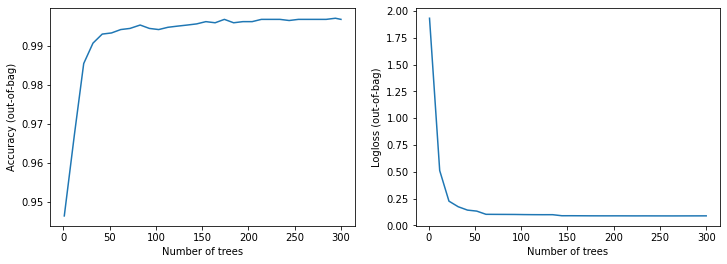

In [18]:
# Plotting the training logs

# Fetch training log data using model inspector
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [19]:
evaluation = model.evaluate(test_tfdf, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

24/24 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9966

loss: 0.0000
accuracy: 0.9966


In [20]:
# Save the model to local directory
# model.save('saved_model/my_model')

In [21]:
# The input features
model.make_inspector().features()

["abdominal_pain" (1; #0),
 "abnormal_menstruation" (1; #1),
 "acidity" (1; #2),
 "acute_liver_failure" (1; #3),
 "altered_sensorium" (1; #4),
 "anxiety" (1; #5),
 "back_pain" (1; #6),
 "belly_pain" (1; #7),
 "blackheads" (1; #8),
 "bladder_discomfort" (1; #9),
 "blister" (1; #10),
 "blood_in_sputum" (1; #11),
 "bloody_stool" (1; #12),
 "blurred_and_distorted_vision" (1; #13),
 "breathlessness" (1; #14),
 "brittle_nails" (1; #15),
 "bruising" (1; #16),
 "burning_micturition" (1; #17),
 "chest_pain" (1; #18),
 "chills" (1; #19),
 "cold_hands_and_feets" (1; #20),
 "coma" (1; #21),
 "congestion" (1; #22),
 "constipation" (1; #23),
 "continuous_feel_of_urine" (1; #24),
 "continuous_sneezing" (1; #25),
 "cough" (1; #26),
 "cramps" (1; #27),
 "dark_urine" (1; #28),
 "dehydration" (1; #29),
 "depression" (1; #30),
 "diarrhoea" (1; #31),
 "dischromic_patches" (1; #32),
 "distention_of_abdomen" (1; #33),
 "dizziness" (1; #34),
 "drying_and_tingling_lips" (1; #35),
 "enlarged_thyroid" (1; #36),


In [22]:
# The feature importances
model.make_inspector().variable_importances()

{'NUM_AS_ROOT': [("vomiting" (1; #121), 23.0),
  ("fatigue" (1; #41), 23.0),
  ("loss_of_appetite" (1; #60), 22.0),
  ("abdominal_pain" (1; #0), 22.0),
  ("high_fever" (1; #45), 21.0),
  ("headache" (1; #44), 20.0),
  ("yellowish_skin" (1; #130), 15.0),
  ("nausea" (1; #71), 14.0),
  ("chills" (1; #19), 14.0),
  ("yellowing_of_eyes" (1; #129), 13.0),
  ("malaise" (1; #63), 12.0),
  ("skin_rash" (1; #100), 10.0),
  ("itching" (1; #55), 10.0),
  ("chest_pain" (1; #18), 9.0),
  ("joint_pain" (1; #56), 7.0),
  ("weight_loss" (1; #126), 7.0),
  ("muscle_pain" (1; #68), 7.0),
  ("lethargy" (1; #59), 6.0),
  ("dark_urine" (1; #28), 5.0),
  ("diarrhoea" (1; #31), 5.0),
  ("cough" (1; #26), 5.0),
  ("sweating" (1; #109), 5.0),
  ("irritability" (1; #53), 5.0),
  ("breathlessness" (1; #14), 4.0),
  ("muscle_weakness" (1; #70), 2.0),
  ("excessive_hunger" (1; #37), 2.0),
  ("phlegm" (1; #82), 2.0),
  ("swelled_lymph_nodes" (1; #110), 1.0),
  ("blurred_and_distorted_vision" (1; #13), 1.0),
  ("diz

In [23]:
# Show overall structure of the model is show
# Include input features, and feature importances above 
# model.summary()